### **Week 3**

**DATASET** <br>
https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv <br>



**METADATA** <br>
application_id: Unique identifier for each application <br>
gender: Applicant's gender (Male, Female)<br>
international: International student (TRUE/FALSE)<br>
gpa: Grade Point Average of the applicant (on 4.0 scale)<br>
major: Undergraduate major (Business, STEM, Humanities)<br>
race: Racial background of the applicant (e.g., White, Black, Asian, Hispanic, Other / null: international student)<br>
gmat: GMAT score of the applicant (800 points)<br>
work_exp: Number of years of work experience (Year)<br>
work_industry: Industry of the applicant's previous work experience (e.g., Consulting, Finance, Technology, etc.)<br>
admission: Admission status (Admit, Waitlist, Null: Deny)<br>

In [225]:
#Import Library
import pandas as pd
import matplotlib.pyplot as plt

1. display 5 columns from dataset

In [226]:
#1
df = pd.read_csv("https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/MBA.csv")
df.head()


,application_id,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,1,Female,False,3.30,Business,Asian,620.0,3.0,Financial Services,Admit
1,2,Male,False,3.28,Humanities,Black,680.0,5.0,Investment Management,NaN
2,3,Female,True,3.30,Business,NaN,710.0,5.0,Technology,Admit
3,4,Male,False,3.47,STEM,Black,690.0,6.0,Technology,NaN
4,5,Male,False,3.35,STEM,Hispanic,590.0,5.0,Consulting,NaN


2. display the info column and conclude what the insight is from that column

In [227]:
#2
df.info()

#conclusion
# ada missing value di kolom race dan admission

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6194 entries, 0 to 6193
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   application_id  6194 non-null   int64  
 1   gender          6194 non-null   object 
 2   international   6194 non-null   bool   
 3   gpa             6194 non-null   float64
 4   major           6194 non-null   object 
 5   race            4352 non-null   object 
 6   gmat            6194 non-null   float64
 7   work_exp        6194 non-null   float64
 8   work_industry   6194 non-null   object 
 9   admission       1000 non-null   object 
dtypes: bool(1), float64(3), int64(1), object(5)
memory usage: 441.7+ KB


3. display the number of each unique value in the race and admission columns (including NaN)

In [228]:
#3a
df['admission'].value_counts(dropna=False)

,count
admission,
NaN,5194
Admit,900
Waitlist,100


In [229]:
#3b
df['race'].value_counts(dropna=False)

,count
race,
NaN,1842
White,1456
Asian,1147
Black,916
Hispanic,596
Other,237


4. fill NaN values in admission column to "deny" and null values in in race column to "other"

In [230]:
#4
df['admission'].fillna('deny', inplace=True)
df['race'].fillna('other', inplace=True)

<ipython-input-230-12caece74d44>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['admission'].fillna('deny', inplace=True)
<ipython-input-230-12caece74d44>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

5. recheck missing value

In [231]:
#5
df.isnull().sum()

,0
application_id,0
gender,0
international,0
gpa,0
major,0
race,0
gmat,0
work_exp,0
work_industry,0
admission,0


6. drop application_id column

In [232]:
# 6
df.drop('application_id', axis=1, inplace=True)

7. show describe column and conclude what the insight is from that column

In [233]:
#7
df.describe()

#conclusion
# minimum gpa adalah 2.65, gmat adalah 570 dan work expirience adalah 1 tahun

,gpa,gmat,work_exp
count,6194.000000,6194.000000,6194.000000
mean,3.250714,651.092993,5.016952
std,0.151541,49.294883,1.032432
min,2.650000,570.000000,1.000000
25%,3.150000,610.000000,4.000000
50%,3.250000,650.000000,5.000000
75%,3.350000,680.000000,6.000000
max,3.770000,780.000000,9.000000


8. make a visualization to analyze admission status based on major and explain the conclusions

<Axes: title={'center': 'Admission Status by Major'}, xlabel='Number of Applicants', ylabel='major'>

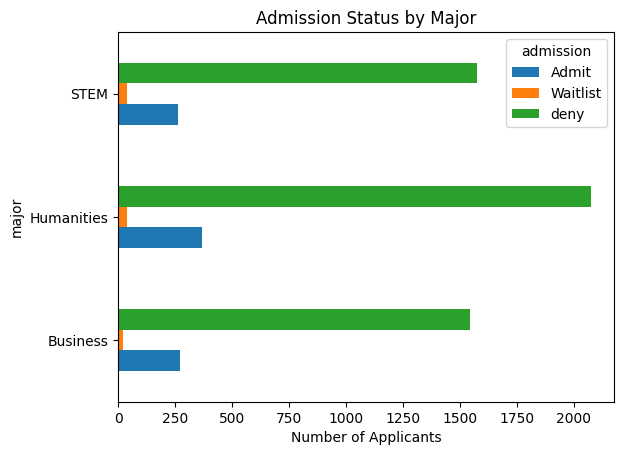

In [234]:
#8
df.groupby(['major', 'admission']).size().unstack().plot(kind='barh', stacked=False, title='Admission Status by Major',xlabel='Number of Applicants')
# Conclusion
# Pada semua major admission yang paling banyak adalah Deny

9. make a visualization to analyze the admissions in each major based on gender and explain the conclusions

<Axes: title={'center': 'Admissions by Major and Gender'}, xlabel='Number of Admitted Applicants', ylabel='major'>

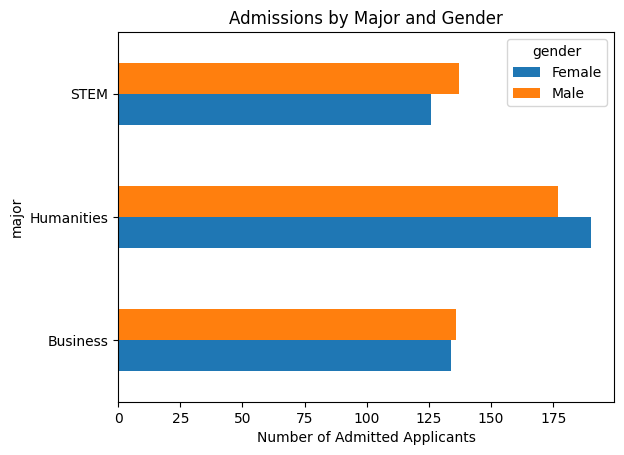

In [235]:
#9
admitted = df['admission'] == 'Admit'
df[admitted].groupby(['major', 'gender']).size().unstack().plot(kind='barh', stacked=False, title='Admissions by Major and Gender', xlabel = 'Number of Admitted Applicants')

# Conclusion
# Pada major STEM gender yang paling banyak diterima adalah Male, untuk major Humanities paling banyak diterima adalah Female, sedangkan untuk major Business adalah Male

10. create your own insightful visualization and explain it in at least 2 sentences

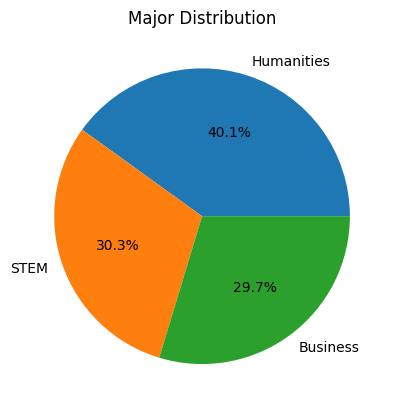

In [236]:
#10
plt.pie(df['major'].value_counts(), labels=df['major'].value_counts().index, autopct='%1.1f%%')
plt.title('Major Distribution')
plt.show()

# Conclusion
# Major yang memiliki banyak siswa yang mendaftar adalah Humanities

11. create your own insightful visualization and explain it in at least 2 sentences

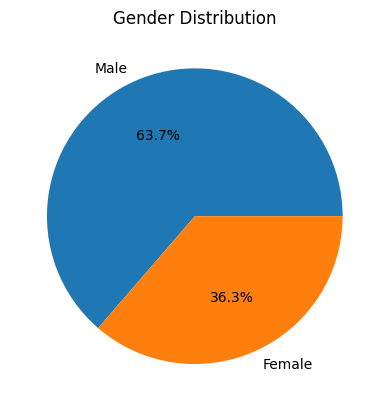

In [237]:
#11
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Gender Distribution')
plt.show()

# Conclusion
# Gender yang lebih banyak mendaftar adalah Male

12. encode categorical columns and display the results

In [238]:
#12a
#encode X
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['international'] = encoder.fit_transform(df['international'])
df['major'] = encoder.fit_transform(df['major'])
df['race'] = encoder.fit_transform(df['race'])
df['work_exp'] = encoder.fit_transform(df['work_exp'])
df['work_industry'] = encoder.fit_transform(df['work_industry'])

df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,Admit
1,1,0,3.28,1,1,680.0,4,6,deny
2,0,1,3.30,0,5,710.0,4,13,Admit
3,1,0,3.47,2,1,690.0,5,13,deny
4,1,0,3.35,2,2,590.0,4,1,deny


In [239]:
#12b
#encode y
df['admission']= encoder.fit_transform(df['admission'])
df.head()

,gender,international,gpa,major,race,gmat,work_exp,work_industry,admission
0,0,0,3.30,0,0,620.0,2,3,0
1,1,0,3.28,1,1,680.0,4,6,2
2,0,1,3.30,0,5,710.0,4,13,0
3,1,0,3.47,2,1,690.0,5,13,2
4,1,0,3.35,2,2,590.0,4,1,2


13. create a heatmap to see the correlation and explain the conclusion

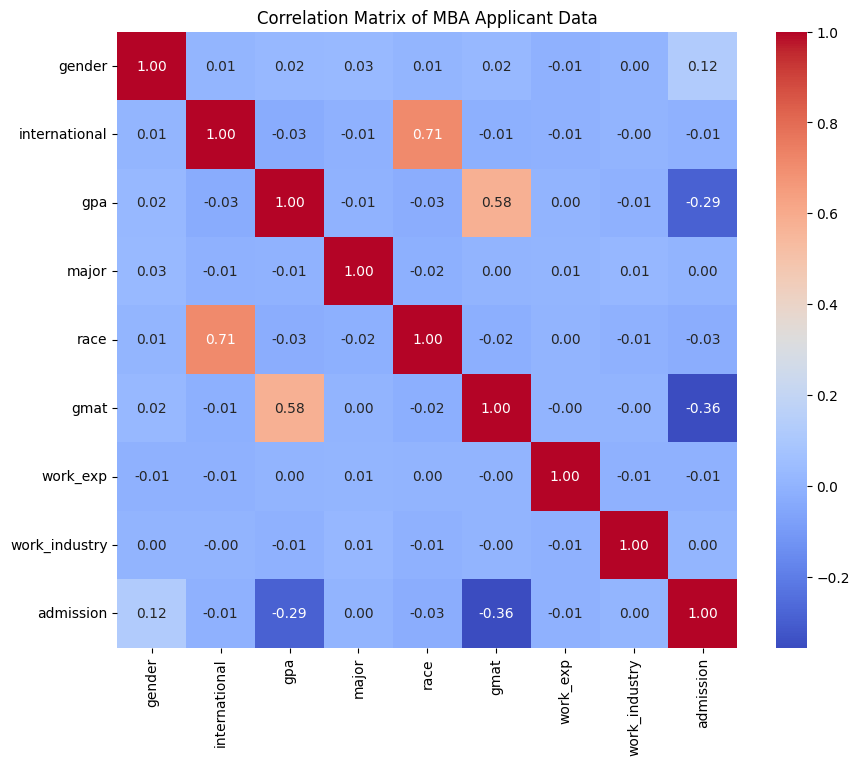

In [240]:
#13
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='0.2f')
plt.title('Correlation Matrix of MBA Applicant Data')
plt.show()

#Conclusion
# GPA dan GMAT: Terdapat korelasi positif yang kuat antara nilai GPA dan skor GMAT. Ini menunjukkan bahwa pelamar dengan nilai akademik yang baik cenderung memiliki skor tes masuk yang tinggi juga.
# Ras dan Internasional: Variabel ras dan internasional memiliki korelasi positif yang cukup kuat. Ini mengindikasikan adanya keterkaitan antara ras tertentu dengan status sebagai pelamar internasional.

**Challenge! Get Extra 10 Points**<br>

get extra 10 points if you can help Lisa predict whether she will be accepted or not.
Lisa is a local student, Lisa's gpa is the average of all applicants, during her undergraduate Lisa studied entrepreneurship, Lisa has an Asian race, gmat score 580, has worked from 2018 to 2020 as a finance.

In [244]:
#Challenge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
X = df.drop('admission', axis=1)
y = df['admission']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)
# Create a Decision Tree Classifier
model = DecisionTreeClassifier()
# Train the model
model.fit(X_train,y_train)
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
gpa = df['gpa'].mean()
# Predict the role for the given character
lisa = [[0,0,gpa,0,0,580,2.0,3]]
predicted_admit = model.predict(lisa)
# Get the predicted role (dicoding)
predicted_admitted = encoder.inverse_transform(predicted_admit)
print("Will Lisa admit or not :", predicted_admitted[0])


Accuracy: 0.778046811945117
Will Lisa admit or not : Admit


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
